In [20]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
from scipy.spatial.transform import Rotation
import ipympl
%matplotlib widget
import json

sns.set_theme()
# LaTex must be installed for this to work
# sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{bm}')

sns.set_theme()
# LaTex must be installed for this to work
# sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{bm}')

# Plot train loss - epoch

In [47]:
train_epoch_loss_csv = "/home/msccomputer/catkin_ws/src/msc_thesis/offline_utils/analysis/Segmentation/data/seg_epoch_train.csv"

train_loss_df = pd.read_csv(train_epoch_loss_csv)


train_loss_df.columns

Index(['epoch', 'UNET - _step', 'UNET - _step__MIN', 'UNET - _step__MAX',
       'UNET - Epoch train loss', 'UNET - Epoch train loss__MIN',
       'UNET - Epoch train loss__MAX', 'RMSprop_0_momentum_and_WD - _step',
       'RMSprop_0_momentum_and_WD - _step__MIN',
       'RMSprop_0_momentum_and_WD - _step__MAX',
       'RMSprop_0_momentum_and_WD - Epoch train loss',
       'RMSprop_0_momentum_and_WD - Epoch train loss__MIN',
       'RMSprop_0_momentum_and_WD - Epoch train loss__MAX',
       'SegNet_seed_1_SGD - _step', 'SegNet_seed_1_SGD - _step__MIN',
       'SegNet_seed_1_SGD - _step__MAX',
       'SegNet_seed_1_SGD - Epoch train loss',
       'SegNet_seed_1_SGD - Epoch train loss__MIN',
       'SegNet_seed_1_SGD - Epoch train loss__MAX',
       'SegNet_seed_1_Adam - _step', 'SegNet_seed_1_Adam - _step__MIN',
       'SegNet_seed_1_Adam - _step__MAX',
       'SegNet_seed_1_Adam - Epoch train loss',
       'SegNet_seed_1_Adam - Epoch train loss__MIN',
       'SegNet_seed_1_Adam - Epoch

In [48]:
np_UNet_train_loss = (train_loss_df["UNET - Epoch train loss"]).to_numpy()
np_SegNet_Adam_train_loss = (train_loss_df["SegNet_seed_1_Adam - Epoch train loss"]).to_numpy()
np_SegNet_RMSProp_train_loss = (train_loss_df["RMSprop_0_momentum_and_WD - Epoch train loss"]).to_numpy()
np_SegNet_SGD_train_loss = (train_loss_df["SegNet_seed_1_SGD - Epoch train loss"]).to_numpy()

np_epochs_train_loss = (train_loss_df["epoch"]).to_numpy()


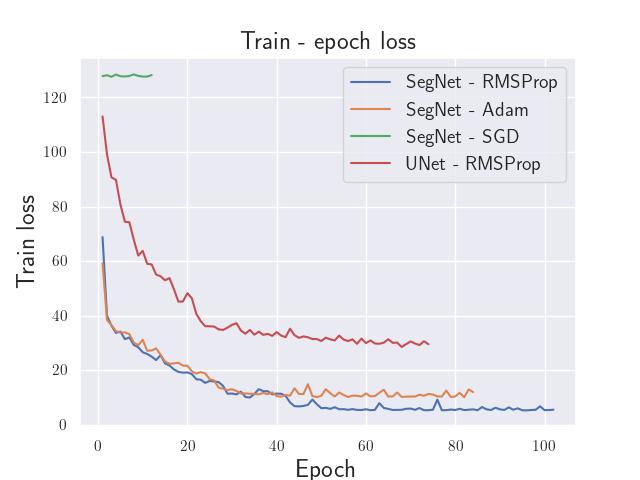

In [56]:
plt.figure()

plt.title("Train - epoch loss", fontsize=18, weight='bold')
plt.xlabel("Epoch", fontsize=18, weight='bold')
plt.ylabel("Train loss", fontsize=18, weight='bold')
plt.plot(np_epochs_train_loss, np_SegNet_RMSProp_train_loss, label="SegNet - RMSProp")
plt.plot(np_epochs_train_loss[:84], np_SegNet_Adam_train_loss[:84], label="SegNet - Adam")
plt.plot(np_epochs_train_loss, np_SegNet_SGD_train_loss, label="SegNet - SGD")
plt.plot(np_epochs_train_loss, np_UNet_train_loss, label="UNet - RMSProp")
plt.legend(fontsize=14)


plt.show()

if input("Save fig?") == "y":
    plt.savefig("seg_train_loss.svg")

# Plot validation score - epoch

In [41]:
val_epoch_score_csv = "/home/msccomputer/catkin_ws/src/msc_thesis/offline_utils/analysis/Segmentation/data/seg_validation_score.csv"

val_epoch_score_df = pd.read_csv(val_epoch_score_csv)


val_epoch_score_df.columns

Index(['epoch', 'UNET - _step', 'UNET - _step__MIN', 'UNET - _step__MAX',
       'UNET - validation Dice', 'UNET - validation Dice__MIN',
       'UNET - validation Dice__MAX', 'RMSprop_0_momentum_and_WD - _step',
       'RMSprop_0_momentum_and_WD - _step__MIN',
       'RMSprop_0_momentum_and_WD - _step__MAX',
       'RMSprop_0_momentum_and_WD - validation Dice',
       'RMSprop_0_momentum_and_WD - validation Dice__MIN',
       'RMSprop_0_momentum_and_WD - validation Dice__MAX',
       'SegNet_seed_1_SGD - _step', 'SegNet_seed_1_SGD - _step__MIN',
       'SegNet_seed_1_SGD - _step__MAX', 'SegNet_seed_1_SGD - validation Dice',
       'SegNet_seed_1_SGD - validation Dice__MIN',
       'SegNet_seed_1_SGD - validation Dice__MAX',
       'SegNet_seed_1_Adam - _step', 'SegNet_seed_1_Adam - _step__MIN',
       'SegNet_seed_1_Adam - _step__MAX',
       'SegNet_seed_1_Adam - validation Dice',
       'SegNet_seed_1_Adam - validation Dice__MIN',
       'SegNet_seed_1_Adam - validation Dice__MAX'],

In [43]:
np_UNet_val_score = (val_epoch_score_df["UNET - validation Dice"]).to_numpy()
np_SegNet_Adam_val_score = (val_epoch_score_df["SegNet_seed_1_Adam - validation Dice"]).to_numpy()
np_SegNet_RMSProp_val_score = (val_epoch_score_df["RMSprop_0_momentum_and_WD - validation Dice"]).to_numpy()
np_SegNet_SGD_val_score = (val_epoch_score_df["SegNet_seed_1_SGD - validation Dice"]).to_numpy()

np_epochs_val_score = (val_epoch_score_df["epoch"]).to_numpy()


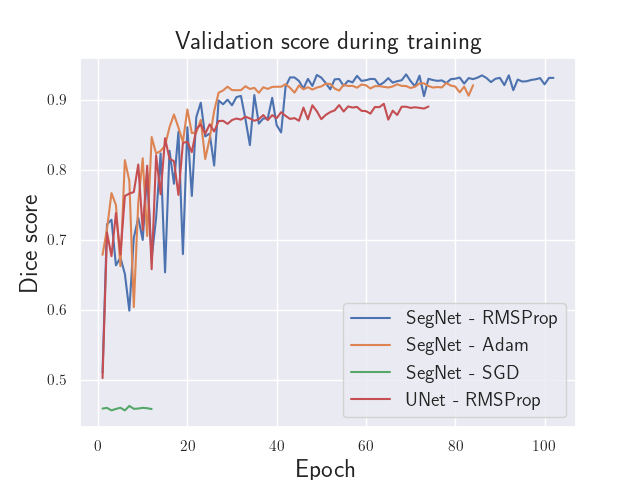

In [57]:
plt.figure()

plt.title("Validation score during training", fontsize=18, weight='bold')
plt.xlabel("Epoch", fontsize=18, weight='bold')
plt.ylabel("Dice score", fontsize=18, weight='bold')
plt.plot(np_epochs_val_score, np_SegNet_RMSProp_val_score, label="SegNet - RMSProp")
plt.plot(np_epochs_val_score[:84], np_SegNet_Adam_val_score[:84], label="SegNet - Adam")
plt.plot(np_epochs_val_score, np_SegNet_SGD_val_score, label="SegNet - SGD")
plt.plot(np_epochs_val_score, np_UNet_val_score, label="UNet - RMSProp")
plt.legend(fontsize=14)


plt.show()

if input("Save fig?") == "y":
    plt.savefig("seg_val_score.svg")